This shall contain all the statistical anaylsis Borough wise.

In [1]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("Dataset1.csv")

/tmp/ipykernel_8687/2149461605.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


In [3]:
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df.dropna(subset=['BOROUGH'], inplace=True)
df.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]
df

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
1,1921573,2012-07-01,21:30,BROOKLYN,11237,40.694988,-73.907296,"(40.6949882, -73.9072959)",IRVING AVENUE,WEIRFIELD STREET,...,0,0,0,0,0,Unspecified,Unspecified,184525,PASSENGER VEHICLE,UNKNOWN
2,1922185,2012-07-01,12:07,BROOKLYN,11206,40.708627,-73.945124,"(40.7086265, -73.9451243)",MANHATTAN AVENUE,SCHOLES STREET,...,0,0,0,3,0,Unspecified,Unspecified,193860,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
3,1922186,2012-07-01,9:40,QUEENS,11369,40.767470,-73.881859,"(40.7674704, -73.8818593)",23 AVENUE,88 STREET,...,0,0,0,0,0,Unspecified,Unspecified,279641,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON
4,1922187,2012-07-01,0:25,QUEENS,11375,40.732979,-73.844348,"(40.7329792, -73.8443478)",GRND CNTRL PARKWAY SR WEST,65 AVENUE,...,0,0,0,0,0,Unspecified,Unspecified,264072,PASSENGER VEHICLE,PASSENGER VEHICLE
5,1923957,2012-07-01,21:31,MANHATTAN,10036,40.763115,-73.999650,"(40.7631147, -73.9996498)",WEST SIDE HIGHWAY,WEST 44 STREET,...,0,0,0,0,0,Fatigued/Drowsy,Unspecified,37642,PASSENGER VEHICLE,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304274,1626453,2013-12-31,18:23,BROOKLYN,11215.0,40.667570,-73.977716,"(40.6675702, -73.9777158)",8 AVENUE,6 STREET,...,0,0,0,0,0,Unspecified,Unspecified,178976,TAXI,TAXI
304276,1631353,2013-12-31,16:30,MANHATTAN,10024.0,40.784975,-73.982638,"(40.7849752, -73.982638)",WEST 79 STREET,RIVERSIDE DRIVE,...,0,0,0,0,0,Unspecified,Unspecified,55063,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON
304278,1621044,2013-12-31,10:45,MANHATTAN,10033.0,40.851180,-73.939238,"(40.8511796, -73.9392377)",WEST 181 STREET,PINEHURST AVENUE,...,0,0,0,0,0,Unspecified,Unspecified,72297,PASSENGER VEHICLE,BUS
304279,1621042,2013-12-31,16:15,MANHATTAN,10010.0,40.735390,-73.975110,"(40.7353901, -73.9751095)",AVENUE C,EAST 23 STREET,...,0,0,0,0,0,Unspecified,Unspecified,25634,VAN,PASSENGER VEHICLE


In [4]:
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

/tmp/ipykernel_8687/2821588045.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


BRONX


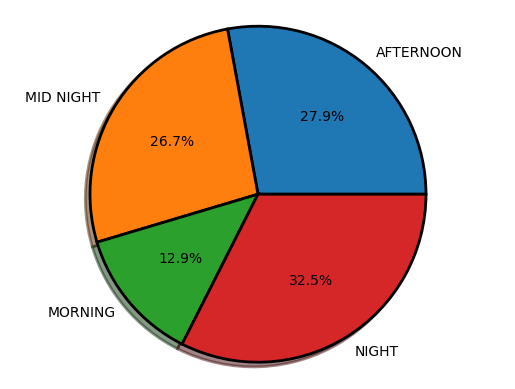

BROOKLYN


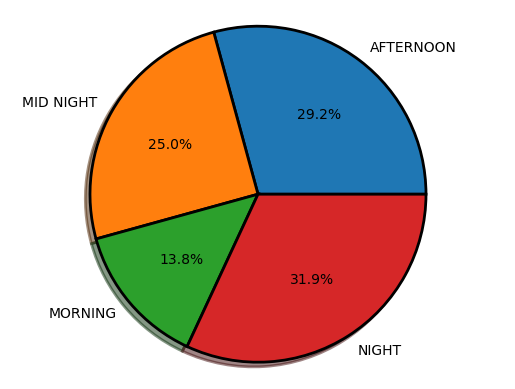

MANHATTAN


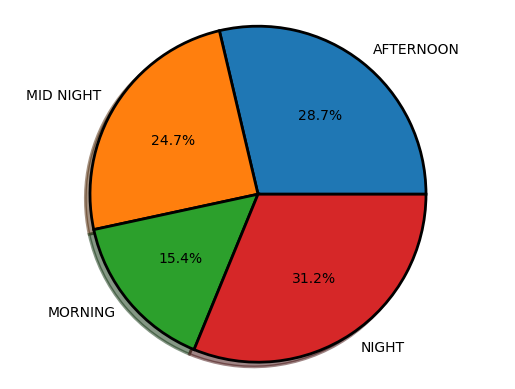

QUEENS


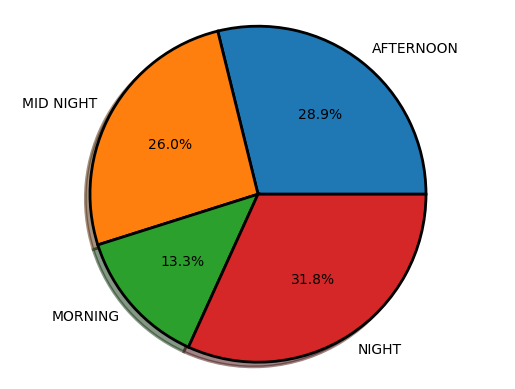

STATEN ISLAND


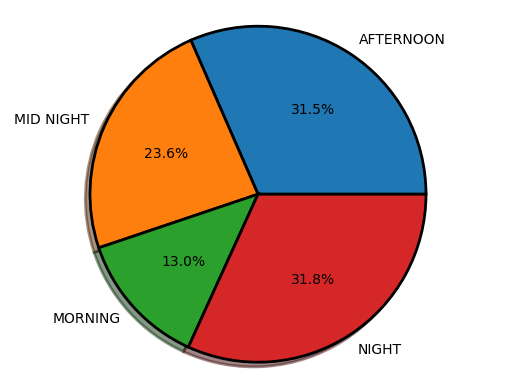

In [6]:
groups = df.groupby(by=['BOROUGH'])

for name, group in groups:
        print(name)
        group['CRASH_DAYTIME'] = group.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
        # df3

        df3 = group.groupby('CRASH_DAYTIME')
        df4 = df3.size()
        plt.pie(df4,labels = df4.index,
                autopct = '%1.1f%%',shadow = True,
                startangle = 0,
                wedgeprops = {"edgecolor":"black",
                        'linewidth': 2,
                        'antialiased': True})
        plt.axis('equal')  
        
        plt.show()